In [2]:
import gzip, sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from joblib import dump, load
import os, json
import collections

from bokeh.io import output_notebook, show
from bokeh.plotting import figure, output_file, save
from bokeh.models import CustomJS, ColumnDataSource
from bokeh.models.tools import HoverTool

In [4]:
activations_no = 1000
usefulness_per_neuron = collections.defaultdict(dict)
target = 'usefulness_loss'
fname = 'output_sinusoidal_5_100_20200107-045548.json.gz'
with gzip.open(os.path.join('..', 'neuron_logs', fname), 'rt') as f:
    neuron_data = json.load(f)
    
features_= []
for e in neuron_data.keys():
    for neuron in neuron_data[e]:
        if ' ' not in neuron:
            continue
        current_data = neuron_data[e][neuron]
        important_features = []
        important_features += [current_data['depth']]
        important_features += [current_data['inverse_depth']]
        important_features += [current_data['width']]
        # important_features += [current_data['input_weights']]
        # important_features += [current_data['output_weights']]
        important_features += [current_data['reg_loss_in_layer']]
        important_features += current_data['activations'][:activations_no]
        usefulness_gold = current_data[target]
        line_of_data = np.array(important_features, dtype = np.float32).reshape(1, -1)
        usefulness_per_neuron[e][neuron] = usefulness_gold

In [21]:
plot_neuron_data = collections.defaultdict(list)
range_of_epochs = len(usefulness_per_neuron)

for pos in range(100):
    layer = 2
    plot_neuron_data['range'] += [list(range(range_of_epochs))]
    gold = np.array([usefulness_per_neuron[e][f'{layer} {pos}'] for e in usefulness_per_neuron])[:range_of_epochs]
    plot_neuron_data['usefulness'] += [gold]
    plot_neuron_data['pos'] += [pos]
    plot_neuron_data['mean'] += [np.mean(gold)]
    plot_neuron_data['std'] += [f'{np.std(gold):.3f}']
    plot_neuron_data['color'] += ['grey']
    plot_neuron_data['hovercolor'] += ['red']

plot_source = ColumnDataSource(plot_neuron_data)

In [22]:
output_file()

TypeError: output_file() missing 1 required positional argument: 'filename'

In [23]:
from bokeh.layouts import gridplot

f1 = figure(width=1300, height=350, x_axis_label = 'epoch', y_axis_label = 'usefulness', title=f'Gold usefulness on layer {layer}')

f1.multi_line(xs='range', ys='usefulness',
             line_width=2, line_color='color', line_alpha=0.2,
             hover_line_color='hovercolor', hover_line_alpha=1.0,
             source=plot_source)




f1.add_tools(HoverTool(show_arrow=False, line_policy='next', tooltips=[
    ('index', '@pos'),
    ('mean_gold', '@mean'),
    ('stdev_gold', '@std'),
])) 

f1.xaxis[0].ticker.desired_num_ticks = range_of_epochs//5

output_file(f'../visualization/testfile_{layer}.html')
save(f1)
#show(f1)


'/home/levai/Renyi/resistant-neurons/visualization/testfile_2.html'

In [2]:
import gzip, sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from joblib import dump, load
import os, json, glob
import collections

from bokeh.io import output_notebook, show
from bokeh.plotting import figure, output_file, save
from bokeh.models import CustomJS, ColumnDataSource
from bokeh.models.tools import HoverTool

files = [x.split('/')[-1] for x in glob.glob('../neuron_logs/*.json.gz')]
print(f'files are: \n{files}')

activations_no = 1000
usefulness_per_neuron = collections.defaultdict(dict)
target = 'usefulness_loss'
for i_prog, fname in enumerate(files):
    
    with gzip.open(os.path.join('..', 'neuron_logs', fname), 'rt') as f:
        neuron_data = json.load(f)

    features_= []
    for e in neuron_data.keys():
        for neuron in neuron_data[e]:
            if ' ' not in neuron:
                continue
            current_data = neuron_data[e][neuron]
            important_features = []
            important_features += [current_data['depth']]
            important_features += [current_data['inverse_depth']]
            important_features += [current_data['width']]
            # important_features += [current_data['input_weights']]
            # important_features += [current_data['output_weights']]
            important_features += [current_data['reg_loss_in_layer']]
            important_features += current_data['activations'][:activations_no]
            usefulness_gold = current_data[target]
            line_of_data = np.array(important_features, dtype = np.float32).reshape(1, -1)
            usefulness_per_neuron[e][neuron] = usefulness_gold

    for layer in range(5):
        
        better_filename = fname.split(".json")[0]
        plot_neuron_data = collections.defaultdict(list)
        range_of_epochs = len(usefulness_per_neuron)

        for pos in range(100):
            plot_neuron_data['range'] += [list(range(range_of_epochs))]
            gold = np.array([usefulness_per_neuron[e][f'{layer} {pos}'] for e in usefulness_per_neuron])[:range_of_epochs]
            plot_neuron_data['usefulness'] += [gold]
            plot_neuron_data['pos'] += [pos]
            plot_neuron_data['mean'] += [np.mean(gold)]
            plot_neuron_data['std'] += [f'{np.std(gold):.3f}']
            plot_neuron_data['color'] += ['grey']
            plot_neuron_data['hovercolor'] += ['red']

        plot_source = ColumnDataSource(plot_neuron_data)

        from bokeh.layouts import gridplot

        f1 = figure(width=1300, height=350, x_axis_label = 'epoch', y_axis_label = 'usefulness', title=f'Gold usefulness on layer {layer} on file {better_filename}')

        f1.multi_line(xs='range', ys='usefulness',
                     line_width=2, line_color='color', line_alpha=0.2,
                     hover_line_color='hovercolor', hover_line_alpha=1.0,
                     source=plot_source)




        f1.add_tools(HoverTool(show_arrow=False, line_policy='next', tooltips=[
            ('index', '@pos'),
            ('mean_gold', '@mean'),
            ('stdev_gold', '@std'),
        ])) 

        f1.xaxis[0].ticker.desired_num_ticks = range_of_epochs//5
        
        
        output_file(f'../visualization/time_series_vis/{better_filename}_l{layer}.html', title=f'{better_filename}_l{layer}')
        save(f1)
    print(f'done with file {i_prog} of {len(files)}')
#show(f1)


files are: 
['output_sinusoidal_5_100_20200107-045548.json.gz', 'output_sinusoidal_5_100_DO_0.1_20200108-122132.json.gz', 'output_sinusoidal_5_100_20200107-041909.json.gz', 'output_sinusoidal_5_100_20200107-030131.json.gz', 'output_sinusoidal_5_100_20200107-034153.json.gz', 'output_sinusoidal_5_100_DO_0.1_20200108-122142.json.gz', 'output_sinusoidal_5_100_DO_0.1_20200108-122127.json.gz', 'output_sinusoidal_5_100_DO_0.1_20200108-122148.json.gz']
done with file 0 of 8
done with file 1 of 8


KeyboardInterrupt: 

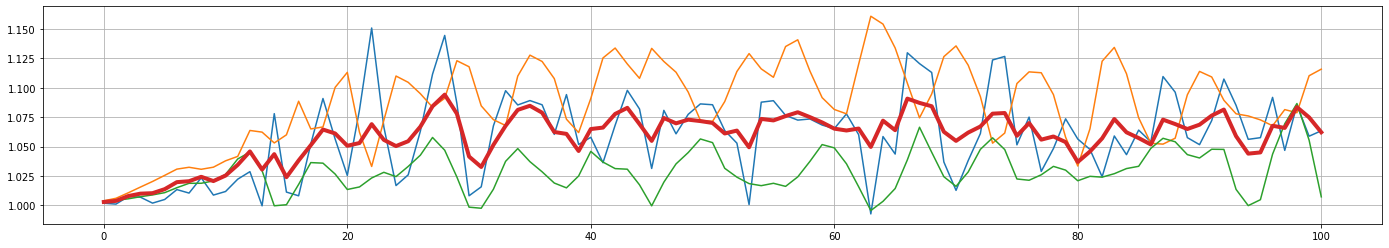

In [28]:
plt.figure(figsize = (24, 4))
plt.grid()

layer = '0'
pos = '19'
data1 = np.array([usefulness_per_neuron[e][f'{layer} {pos}'] for e in usefulness_per_neuron])

layer = '0'
pos = '94'
data2 = np.array([usefulness_per_neuron[e][f'{layer} {pos}'] for e in usefulness_per_neuron])
pos = '82'
data3 = np.array([usefulness_per_neuron[e][f'{layer} {pos}'] for e in usefulness_per_neuron])
plt.plot(data1)
plt.plot(data2)
plt.plot(data3)
plt.plot((data1+data2+data3)/3, linewidth = 4)